In [1]:
import numpy as np
import pandas as pd
from scipy.special import lambertw
import matplotlib.pyplot as plt
import pickle
import lmfit

from scipy.misc import derivative


In [2]:
def ws_to_tev(ws):
    return ws * 6241509.6471204


def kw_to_nprotons(kw):
    return ws_to_tev(kw * 1000) / 6.5


In [3]:
def relative_wrap(n, d_func, **kwargs):
    return 1 - (1 + np.power(d_func(n, **kwargs), 2)) * np.exp(-np.power(d_func(n, **kwargs), 2))


In [4]:
def model_2(n, rho, kappa):
    return rho * np.power(kappa / (2 * np.exp(1)), kappa) * np.power(1 / np.log(n), kappa)

def wrap_2(n, rho, kappa):
    return relative_wrap(n, model_2, rho=rho, kappa=kappa)

def wrap_2_d(n, rho, kappa):
    return 2*kappa*rho**2*(kappa*np.exp(-1)/2)**(2*kappa)*(-rho**2*(kappa*np.exp(-1)/2)**(2*kappa)/np.log(n)**(2*kappa) - 1)*np.exp(-rho**2*(kappa*np.exp(-1)/2)**(2*kappa)/np.log(n)**(2*kappa)) / \
        (n*np.log(n)*np.log(n)**(2*kappa)) + 2*kappa*rho**2*(kappa*np.exp(-1)/2)**(2*kappa) * \
        np.exp(-rho**2*(kappa*np.exp(-1)/2)**(2*kappa)/np.log(n)
               ** (2*kappa))/(n*np.log(n)*np.log(n)**(2*kappa))

In [5]:
def model_4(n, rho, kappa):
    return rho * np.power(
        -np.exp(1) * lambertw(
            -(1 / (np.exp(1))) * np.power(rho / 6, 1 / kappa) * np.power(n * 8 / 7, -2/kappa),
            -1
        ),
        -kappa)

def wrap_4(n, rho, kappa):
    return relative_wrap(n, model_4, rho=rho, kappa=kappa)

def wrap_4_d(n, rho, kappa):
    return -4*rho**2*(-rho**2/(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa) - 1)*np.exp(-rho**2/(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa))/(n*(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa)*(lambertw(-(rho/6) ** (1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1) + 1)) - 4*rho**2*np.exp(-rho**2/(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa))/(n*(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa)*(lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1) + 1))

In [6]:
with open('Just_The_Data.pkl', 'rb') as f:
    data = pickle.load(f)

In [7]:
data[0]

2018-10-29 11:02:45.519999981+00:00         NaN
2018-10-29 11:02:45.640000105+00:00         NaN
2018-10-29 11:02:45.653000116+00:00    0.015397
2018-10-29 11:02:45.660000086+00:00         NaN
2018-10-29 11:02:45.680000067+00:00         NaN
                                         ...   
2018-10-29 14:29:46.680000067+00:00         NaN
2018-10-29 14:29:46.858000040+00:00         NaN
2018-10-29 14:29:47+00:00                   NaN
2018-10-29 14:29:47.019999981+00:00         NaN
2018-10-29 14:29:47.140000105+00:00         NaN
Name: LHC.BLM.LIFETIME:B1_LOSS_KW, Length: 149113, dtype: float64

In [8]:
beam1, beam2 = data
beam1 = beam1.dropna()
beam2 = beam2.dropna()

In [9]:
# view datetime index as seconds
seconds_1 = np.asarray(beam1.index.view(int)) / 1e9
seconds_1 -= seconds_1[0]

seconds_2 = np.asarray(beam2.index.view(int)) / 1e9
seconds_2 -= seconds_2[0]

In [10]:
data_1 = beam1.values
data_2 = beam2.values

Text(0, 0.5, 'Number of protons')

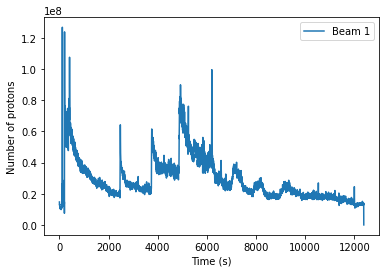

In [11]:
plt.plot(seconds_1, kw_to_nprotons(data_1), label='Beam 1')
#plt.plot(seconds_2, data_2, label='Beam 2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Number of protons')

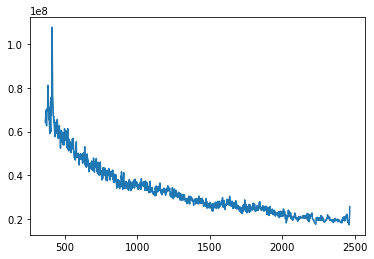

In [12]:
from_idx = 240
to_idx = 1580

plt.plot(seconds_1[from_idx:to_idx], kw_to_nprotons(data_1[from_idx:to_idx]))
x = seconds_1[from_idx:to_idx]
y = kw_to_nprotons(data_1[from_idx:to_idx])

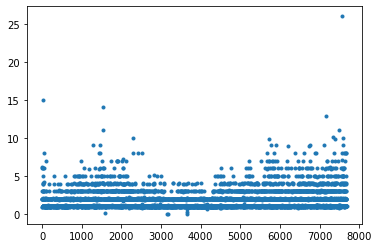

In [13]:
plt.plot(np.diff(seconds_1), ".")

In [14]:
with open('Just_The_Data_2.pkl', 'rb') as f:
    data = pickle.load(f)

In [15]:
beam1, beam2 = data
beam1 = beam1.dropna()
beam2 = beam2.dropna()

In [16]:
# view datetime index as seconds
seconds_1 = np.asarray(beam1.index.view(int)) / 1e9
seconds_1 -= seconds_1[0]

seconds_2 = np.asarray(beam2.index.view(int)) / 1e9
seconds_2 -= seconds_2[0]

In [17]:
data_1 = beam1.values
data_2 = beam2.values

Text(0, 0.5, 'Number of protons')

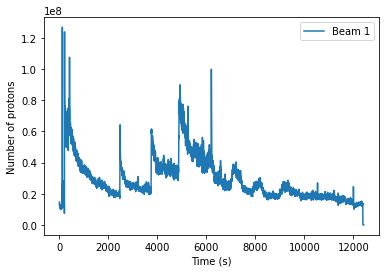

In [18]:
plt.plot(seconds_1, data_1, label='Beam 1')
#plt.plot(seconds_2, data_2, label='Beam 2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Number of protons')

403.00999999046326


Text(0, 0.5, 'Number of protons')

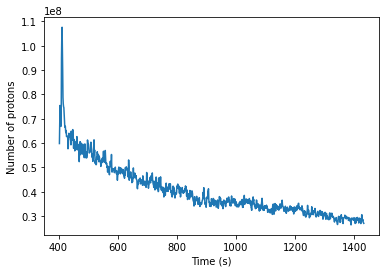

In [64]:
from_idx = 450
to_idx = 1580

plt.plot(seconds_1[from_idx:to_idx], data_1[from_idx:to_idx])
x = seconds_1[from_idx:to_idx]
y = data_1[from_idx:to_idx]
print(x[0])
plt.xlabel('Time (s)')
plt.ylabel('Number of protons')

In [20]:
with open("protons.pkl", "rb") as f:
    protons1, protons2 = pickle.load(f)

In [21]:
protons1 = protons1.dropna()
protons2 = protons2.dropna()

In [22]:
seconds_p_1 = np.asarray(protons1.index.view(int)) / 1e9
seconds_p_1 -= seconds_p_1[0]

seconds_p_2 = np.asarray(protons2.index.view(int)) / 1e9
seconds_p_2 -= seconds_p_2[0]

In [23]:
p1 = protons1.values
p2 = protons2.values

In [24]:
# fit linear model to protons
p1_fit = np.polyfit(seconds_p_1, p1, 1)
p2_fit = np.polyfit(seconds_p_2, p2, 1)

In [25]:
p1_fit

array([-2.09672259e+08,  1.70247671e+13])

Text(0.5, 1.0, 'Beam Intensity')

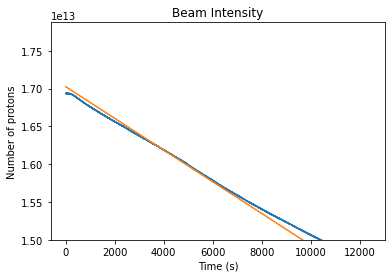

In [26]:
plt.plot(seconds_p_1, p1)
plt.plot(seconds_p_1, p1_fit[0] * seconds_p_1 + p1_fit[1])
plt.ylim(1.5e13)
plt.xlabel('Time (s)')
plt.ylabel('Number of protons')
plt.title("Beam Intensity")

Text(0.5, 1.0, 'Beam Intensity')

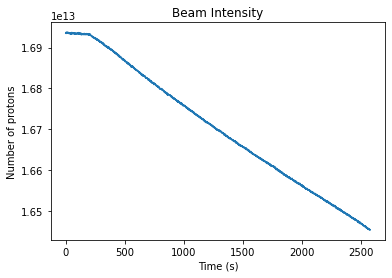

In [27]:
from_idx = 1
to_idx = 2580

plt.plot(seconds_p_1[from_idx:to_idx], p1[from_idx:to_idx])

x_p = seconds_p_1[from_idx:to_idx]
y_p = p1[from_idx:to_idx]
plt.xlabel('Time (s)')
plt.ylabel('Number of protons')
plt.title("Beam Intensity")


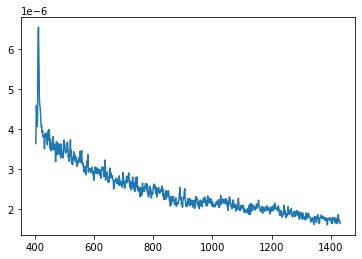

In [71]:
y_normed = y / y_p[-1]
plt.plot(x, y_normed)

In [232]:
def resid(params, x, y):
    rho = params['rho'].value
    kappa = params['kappa'].value
    return y + wrap_2_d(x, rho, kappa)

In [227]:
np.count_nonzero(np.isnan(y_normed))
np.count_nonzero(np.isnan(x-x[0]))

0

In [259]:
rescaled_x = (x-x[0]+10.0)*11245
rescaled_y = y_normed / 11245


In [260]:
# init parameters for lmfit
params = lmfit.Parameters()
params.add('rho', value=10.5, min=0)
params.add('kappa', value=0.33, min=0)

In [261]:
result = lmfit.minimize(resid, params, args=(rescaled_x, rescaled_y))
result_2 = result
result

In [262]:
wrap_2_d(rescaled_x, result.params['rho'].value, result.params['kappa'].value)

array([-2.83171052e-10, -2.93094820e-10, -3.01688610e-10, ...,
       -1.43239098e-10, -1.43172238e-10, -1.43103408e-10])

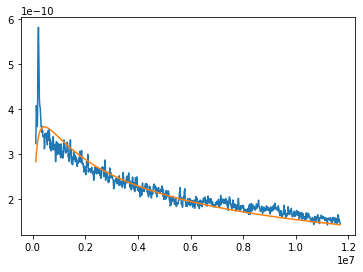

In [263]:
plt.plot(rescaled_x, rescaled_y)
plt.plot(rescaled_x, -wrap_2_d(rescaled_x,
         result.params['rho'].value, result.params['kappa'].value))


In [160]:
# init parameters for lmfit
params = lmfit.Parameters()
params.add('rho', value=10.5, min=0)
params.add('kappa', value=0.33, min=0)

In [161]:
def resid(params, x, y):
    rho = params['rho'].value
    kappa = params['kappa'].value
    model = wrap_4_d(x, rho, kappa)
    # keep real part of model only
    model = model.real
    return y + model

In [162]:
np.count_nonzero(np.isnan(y_normed))
np.count_nonzero(np.isnan(x-x[0]))

0

In [163]:
result = lmfit.minimize(resid, params, args=(x, y_normed))
result_4 = result
result

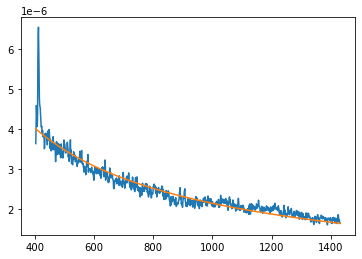

In [164]:
plt.plot(x, y_normed)
plt.plot(x, np.absolute((wrap_4_d(x, result.params['rho'].value, result.params['kappa'].value)).real))


In [214]:
rescaled_x = (x-x[0]+10.02)*11245
rescaled_y = y_normed / 11245

In [222]:
# init parameters for lmfit
params = lmfit.Parameters()
params.add('rho', value=10.5, min=0)
params.add('kappa', value=0.33, min=0.01)

In [223]:
def resid(params, x, y):
    rho = params['rho'].value
    kappa = params['kappa'].value
    model = wrap_4_d(x, rho, kappa)
    # keep real part of model only
    model = model.real
    if np.isnan(model).any():
        print(rho, kappa)
    return y + model

In [224]:
np.count_nonzero(np.isnan(y_normed))
np.count_nonzero(np.isnan(x-x[0]))

0

In [225]:
result = lmfit.minimize(resid, params, args=(rescaled_x, rescaled_y))
result_4 = result
result

0.19897171080018317 0.010094109787780692


ValueError: NaN values detected in your input data or the output of your objective/model function - fitting algorithms cannot handle this! Please read https://lmfit.github.io/lmfit-py/faq.html#i-get-errors-from-nan-in-my-fit-what-can-i-do for more information.

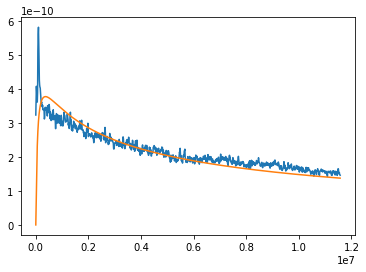

In [213]:
plt.plot(rescaled_x, rescaled_y)
plt.plot(rescaled_x, np.absolute((wrap_4_d(rescaled_x, result.params['rho'].value, result.params['kappa'].value)).real))


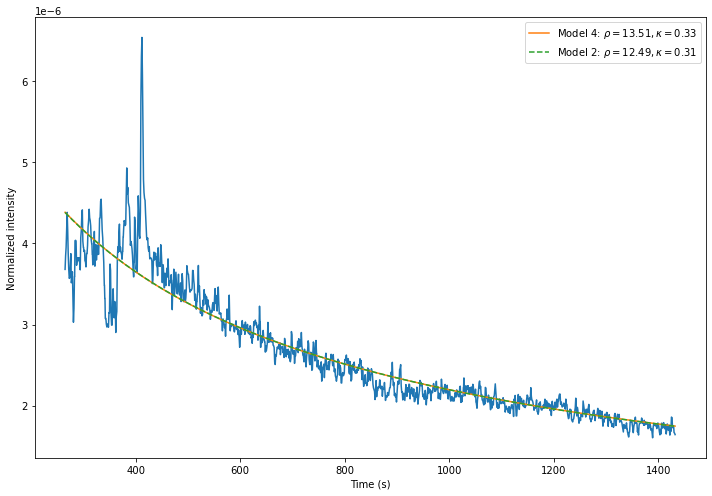

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(x, y_normed)
ax.plot(x, np.absolute((wrap_4_d(x, result_4.params['rho'].value, result_4.params['kappa'].value)).real), label=f"Model 4: $\\rho={result_4.params['rho'].value:.2f}, \\kappa={result_4.params['kappa'].value:.2f}$")
ax.plot(x, np.absolute((wrap_2_d(x, result_2.params['rho'].value, result_2.params['kappa'].value))),
         label=f"Model 2: $\\rho={result_2.params['rho'].value:.2f}, \\kappa={result_2.params['kappa'].value:.2f}$", linestyle='--')
ax.legend()

ax.set_xlabel('Time (s)')
ax.set_ylabel('Normalized intensity')

plt.tight_layout()
